## Step 1: Data Importation and Overview


In [1]:
import pandas as pd
import numpy as np

train0_df = pd.read_csv('train.csv')
test0_df = pd.read_csv('test.csv')

# Display the first few rows of the train dataset
train0_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [2]:
train_df = train0_df
test_df = test0_df

NameError: name 'train0_df' is not defined

In [ ]:
# Check for missing values in the training set
print("Missing values in each column (Training Set):")
print(train_df.isnull().sum())

# Basic information about the training dataset
print("\nTraining Dataset Information:")
train_df.info()

# Statistical summary of the training dataset
print("\nStatistical Summary (Training Set):")
print(train_df.describe())

# Check the distribution of the target variable in the training set
print("\nTarget variable distribution (Training Set):")
print(train_df['Exited'].value_counts())

## Step 2:  Exploratory Data Analysis


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set the default color palette
sns.set_palette("husl")

### **Visualize the Distribution of the Target Variable** **bold text**

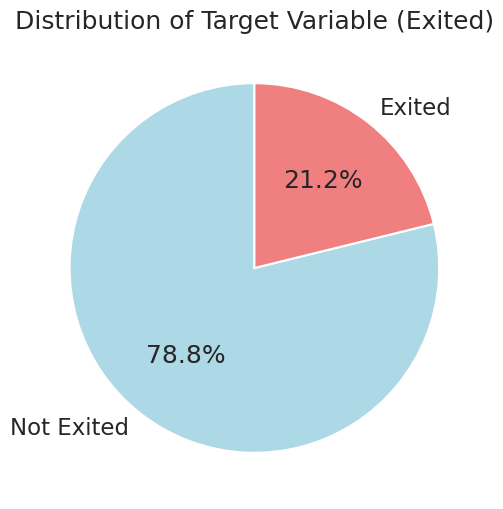

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'Exited' column
counts = train_df['Exited'].value_counts()

# Create labels for the pie chart
labels = ['Not Exited', 'Exited']

# Define your desired colors
colors = ['lightblue', 'lightcoral']

# Create the pie chart with custom colors
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Target Variable (Exited)')
plt.show()

### **Visualize the Distribution of the Numerical Variables**

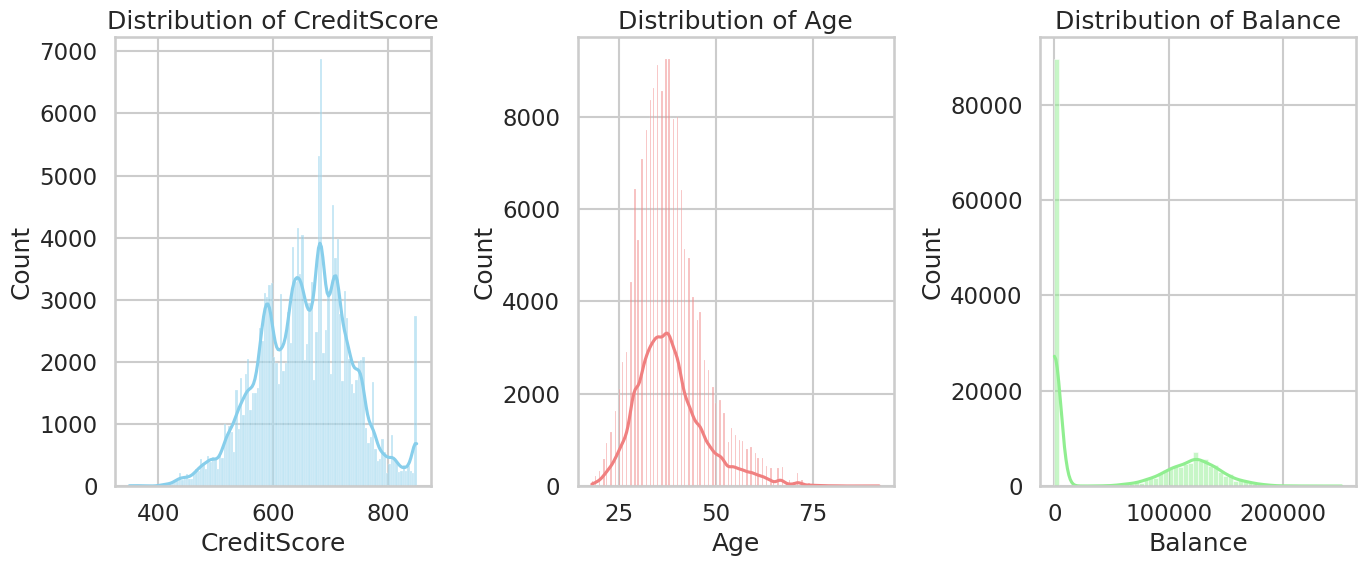

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Plot histograms with KDE
sns.histplot(train_df['CreditScore'], kde=True, ax=axes[0], color='skyblue')
sns.histplot(train_df['Age'], kde=True, ax=axes[1], color='lightcoral')
sns.histplot(train_df['Balance'], kde=True, ax=axes[2], color='lightgreen')

# Set titles and labels
axes[0].set_title('Distribution of CreditScore')
axes[1].set_title('Distribution of Age')
axes[2].set_title('Distribution of Balance')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

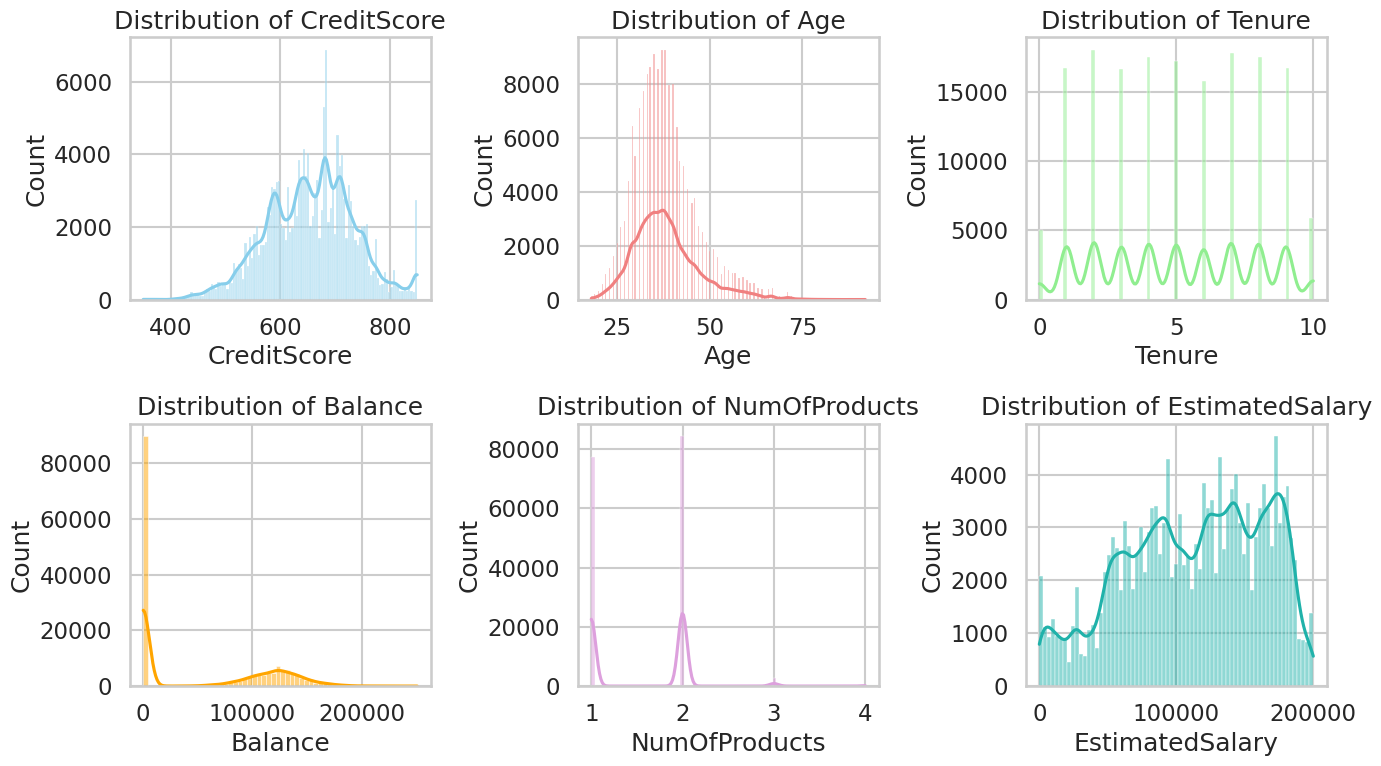

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of all numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Set style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 8))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten for easier iteration

# Colors for each plot (add more if needed)
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'plum', 'lightseagreen']

# Plot histograms with KDE
for i, feature in enumerate(numerical_features):
    sns.histplot(train_df[feature], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<ipython-input-47-d092b62e81f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=feature, data=train_df, palette='coolwarm')
<ipython-input-47-d092b62e81f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=feature, data=train_df, palette='coolwarm')
<ipython-input-47-d092b62e81f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=feature, data=train_df, palette='coolwarm')
<ipython-input-47-d092b62e81f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

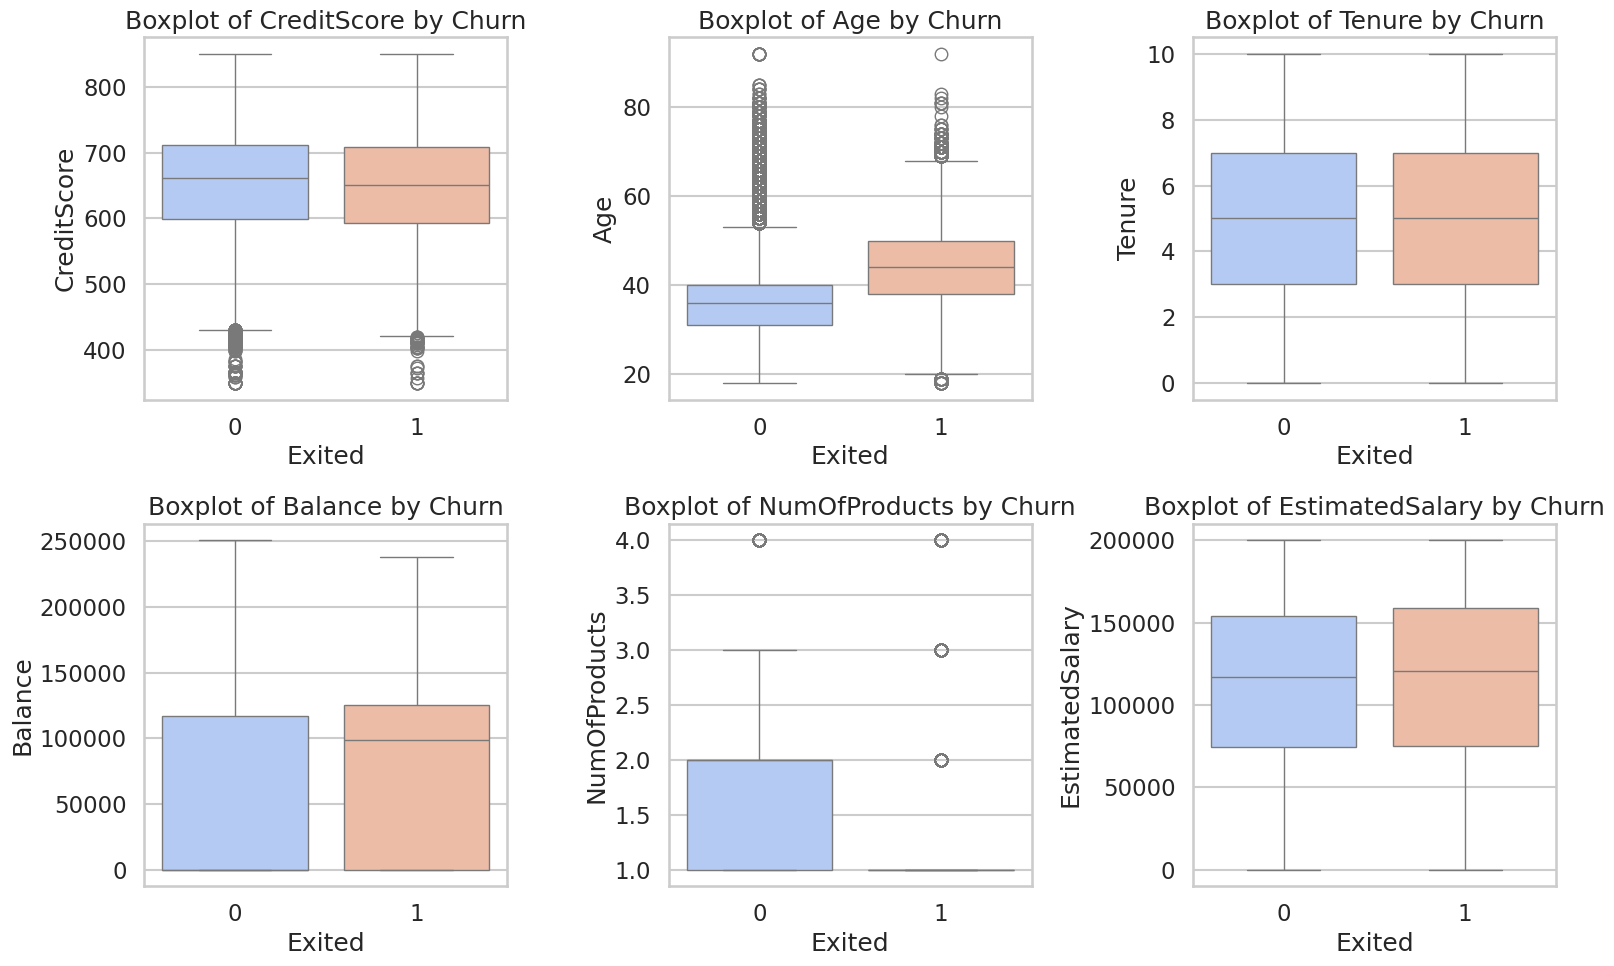

In [ ]:
# Plot boxplots for numerical features by Exited
plt.figure(figsize=(16, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Exited', y=feature, data=train_df, palette='coolwarm')
    plt.title(f'Boxplot of {feature} by Churn')

plt.tight_layout()
plt.show()

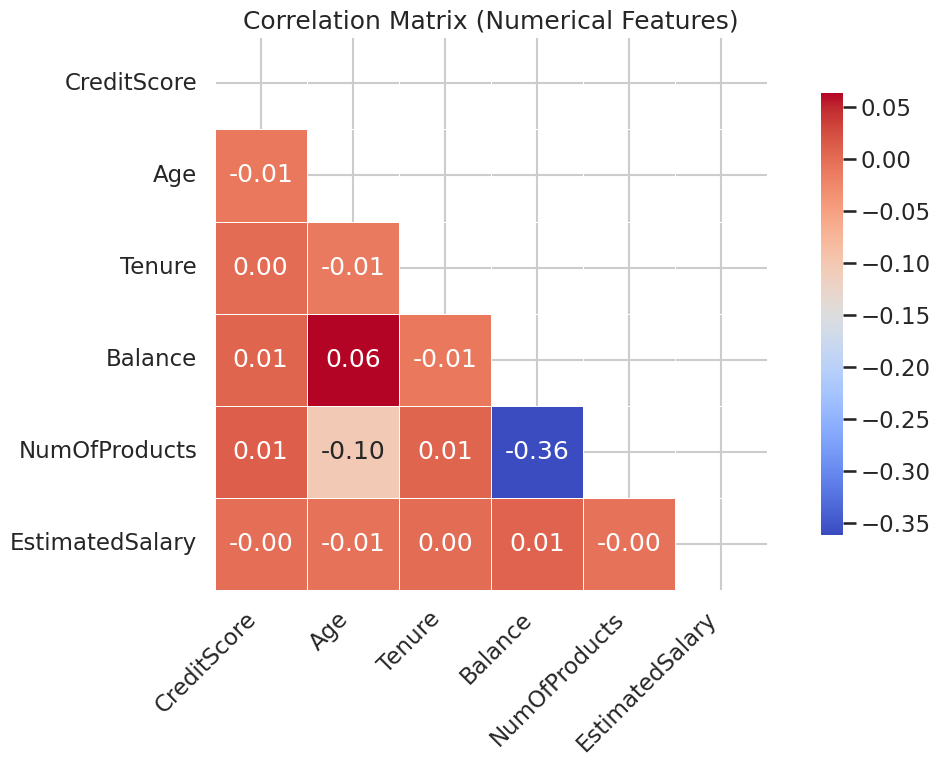

In [ ]:
# Select only numerical columns for correlation
corr_matrix = train_df[numerical_features].corr()

# Set context for larger font size
sns.set_context("talk")

# Plot the correlation matrix
plt.figure(figsize=(12, 8))

# Mask the upper triangle for a cleaner look
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix (Numerical Features)', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Visualize the Distribution of the Categorical Variables**

In [ ]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

<ipython-input-50-bce040d63878>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-50-bce040d63878>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-50-bce040d63878>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-50-bce040d63878>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


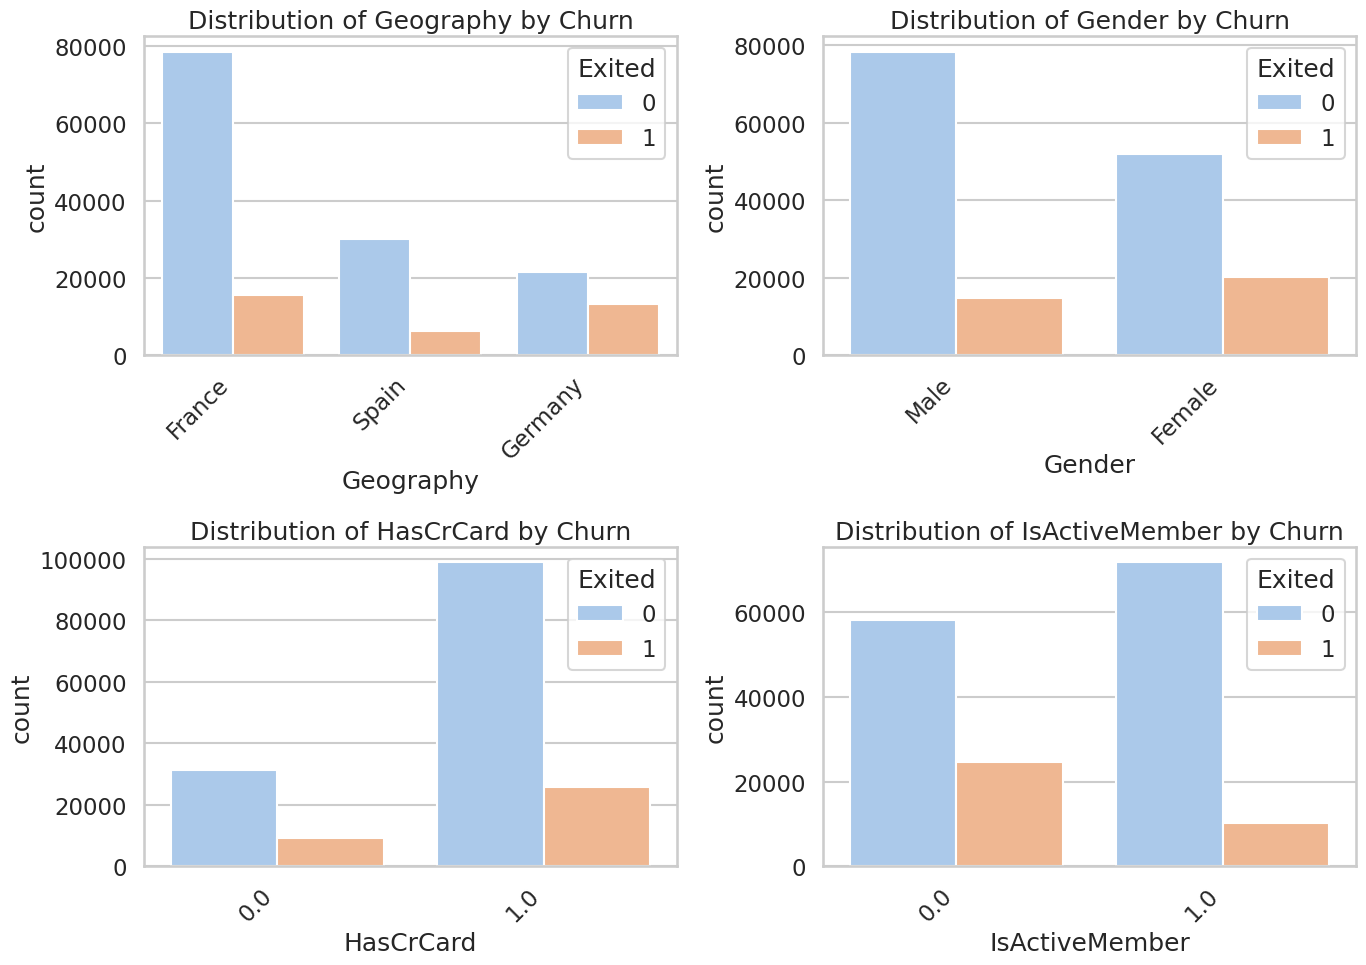

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("pastel")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Exited', data=train_df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Churn')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


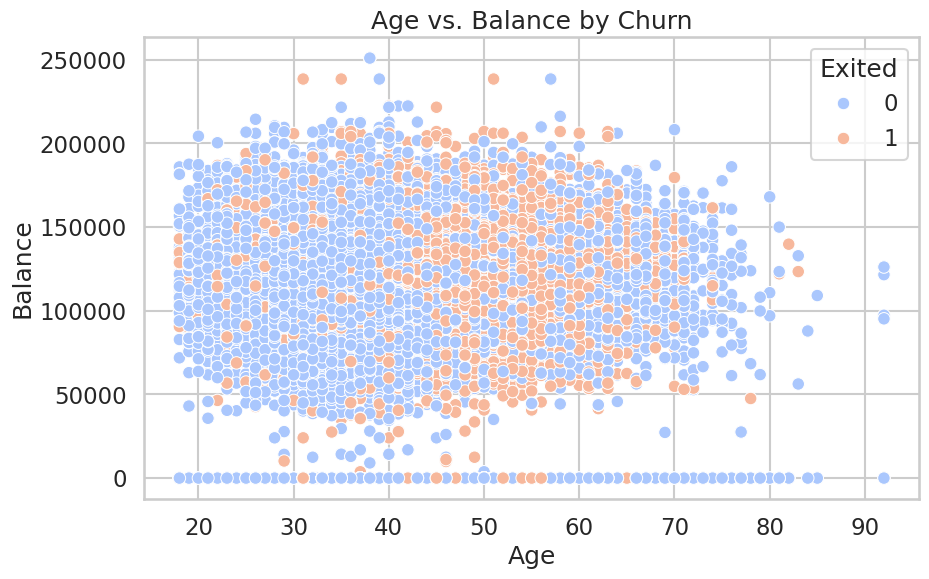

In [ ]:
# Plot Age vs. Balance with hue as Exited
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=train_df, palette='coolwarm')
plt.title('Age vs. Balance by Churn')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


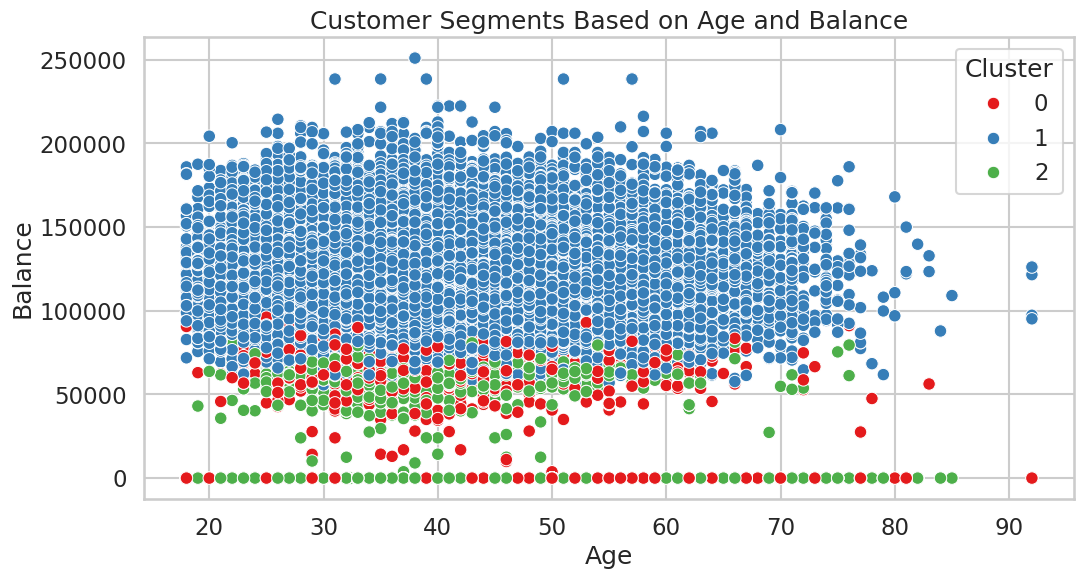

In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
X = train_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
train_df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Balance', hue='Cluster', data=train_df, palette='Set1')
plt.title('Customer Segments Based on Age and Balance')
plt.show()

## Step 3: Data Pre-processing

#### 3.1 One-Hot encoding

In [ ]:
# Perform one-hot encoding on categorical features
train_df = pd.get_dummies(train_df, columns=['Geography', 'Gender'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Geography', 'Gender'], drop_first=True)

#### 3.2 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the training set
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])

# Apply scaling to the test set
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])

#### 3.3 Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train_df.drop(columns=['Exited', 'CustomerId', 'Surname'])  # Exclude target and non-numeric columns
y = train_df['Exited']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Training set shape: (132027, 13)
Validation set shape: (33007, 13)


## Step 4: Model Selection and Training

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_log_reg = log_reg.predict(X_val)
y_prob_log_reg = log_reg.predict_proba(X_val)[:, 1]

# Evaluate the model
print("Logistic Regression:")
print("Classification Report:")
print(classification_report(y_val, y_pred_log_reg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_log_reg))
print("\nROC-AUC Score:")
print(roc_auc_score(y_val, y_prob_log_reg))


Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     26052
           1       0.00      0.00      0.00      6955

    accuracy                           0.79     33007
   macro avg       0.39      0.50      0.44     33007
weighted avg       0.62      0.79      0.70     33007


Confusion Matrix:
[[26052     0]
 [ 6955     0]]

ROC-AUC Score:
0.5003642662140189


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf.predict(X_val)
y_prob_rf = rf.predict_proba(X_val)[:, 1]

# Evaluate the model
print("Random Forest:")
print("Classification Report:")
print(classification_report(y_val, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))
print("\nROC-AUC Score:")
print(roc_auc_score(y_val, y_prob_rf))

Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26052
           1       0.73      0.54      0.62      6955

    accuracy                           0.86     33007
   macro avg       0.81      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007


Confusion Matrix:
[[24657  1395]
 [ 3213  3742]]

ROC-AUC Score:
0.8785516507768626


**XGBoost**

In [ ]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)
y_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("XGBoost:")
print("Classification Report:")
print(classification_report(y_val, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_xgb))
print("\nROC-AUC Score:")
print(roc_auc_score(y_val, y_prob_xgb))

XGBoost:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.73      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.81      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007


Confusion Matrix:
[[24633  1419]
 [ 3031  3924]]

ROC-AUC Score:
0.8876462829470187


**LightGBM**

In [ ]:
import lightgbm as lgb

# Initialize the model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lgb = lgb_model.predict(X_val)
y_prob_lgb = lgb_model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("LightGBM:")
print("Classification Report:")
print(classification_report(y_val, y_pred_lgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_lgb))
print("\nROC-AUC Score:")
print(roc_auc_score(y_val, y_prob_lgb))


[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
LightGBM:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007


Confusion Matrix:
[[24695  1357]
 [ 3034  3921]]

ROC-AUC Score:
0.890700648142

**Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
nn_model = MLPClassifier(random_state=42)

# Train the model
nn_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_nn = nn_model.predict(X_val)
y_prob_nn = nn_model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("Neural Network:")
print("Classification Report:")
print(classification_report(y_val, y_pred_nn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_nn))
print("\nROC-AUC Score:")
print(roc_auc_score(y_val, y_prob_nn))


Neural Network:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.27      0.42     26052
           1       0.25      0.92      0.40      6955

    accuracy                           0.41     33007
   macro avg       0.59      0.60      0.41     33007
weighted avg       0.79      0.41      0.41     33007


Confusion Matrix:
[[ 6970 19082]
 [  527  6428]]

ROC-AUC Score:
0.7003980453625736


### Model Evaluation

In [ ]:
import pandas as pd

# Create a dictionary to store the evaluation metrics
results = {
    "Model": [],
    "ROC-AUC Score": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Function to add results to the dictionary
def add_results(model_name, y_true, y_pred, y_prob):
    results["Model"].append(model_name)
    results["ROC-AUC Score"].append(roc_auc_score(y_true, y_prob))
    report = classification_report(y_true, y_pred, output_dict=True)
    results["Precision"].append(report['1']['precision'])
    results["Recall"].append(report['1']['recall'])
    results["F1 Score"].append(report['1']['f1-score'])

# Add results for Logistic Regression
add_results("Logistic Regression", y_val, y_pred_log_reg, y_prob_log_reg)

# Add results for Random Forest
add_results("Random Forest", y_val, y_pred_rf, y_prob_rf)

# Add results for XGBoost
add_results("XGBoost", y_val, y_pred_xgb, y_prob_xgb)

# Add results for LightGBM
add_results("LightGBM", y_val, y_pred_lgb, y_prob_lgb)

# Add results for Neural Network
add_results("Neural Network", y_val, y_pred_nn, y_prob_nn)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  ROC-AUC Score  Precision    Recall  F1 Score
0  Logistic Regression       0.500364   0.000000  0.000000  0.000000
1        Random Forest       0.878552   0.728441  0.538030  0.618922
2              XGBoost       0.887646   0.734419  0.564198  0.638153
3             LightGBM       0.890701   0.742895  0.563767  0.641053
4       Neural Network       0.700398   0.251980  0.924227  0.395996


#### Model performance

*   Logistic Regression: Performed poorly with an ROC-AUC score of 0.500, and precision, recall, and F1 score all at 0.000. This indicates the model failed to classify the positive class correctly.

*   Random Forest: Achieved a good ROC-AUC score of 0.879, with a precision of 0.728, recall of 0.538, and F1 score of 0.619. This model strikes a balance between precision and recall.
*   XGBoost: Showed strong performance with an ROC-AUC score of 0.888, precision of 0.734, recall of 0.564, and F1 score of 0.638. It improves on recall compared to Random Forest.


*   LightGBM: Slightly outperformed XGBoost with the highest ROC-AUC score of 0.891, precision of 0.743, recall of 0.564, and F1 score of 0.641, making it the best-performing model in this set.


*   Neural Network: Had a moderate ROC-AUC score of 0.700, with lower precision at 0.252 but very high recall of 0.924, leading to a lower F1 score of 0.396. This model is highly sensitive but lacks precision.

## Step 5: Hyperparameter Tuning with Grid Search

*I have included the code for this section but the output is not availabe due to computing power*

**Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear']  # Optimization algorithms
}

# Initialize GridSearchCV
grid_log_reg = GridSearchCV(estimator=LogisticRegression(random_state=42),
                             param_grid=param_grid_log_reg,
                             scoring='roc_auc',
                             cv=5,
                             n_jobs=-1)

# Fit GridSearchCV
grid_log_reg.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Logistic Regression:")
print(grid_log_reg.best_params_)
print("Best ROC-AUC Score:")
print(grid_log_reg.best_score_)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:44: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


Best Parameters for Logistic Regression:
{'C': 0.01, 'solver': 'newton-cg'}
Best ROC-AUC Score:
0.8178549102267603


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid_rf,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit GridSearchCV
grid_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Random Forest:")
print(grid_rf.best_params_)
print("Best ROC-AUC Score:")
print(grid_rf.best_score_)

XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_xgb = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42),
                        param_grid=param_grid_xgb,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1)

# Fit GridSearchCV
grid_xgb.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for XGBoost:")
print(grid_xgb.best_params_)
print("Best ROC-AUC Score:")
print(grid_xgb.best_score_)

LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for LightGBM
param_grid_lgb = {
    'n_estimators': [50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 63, 127]
}

# Initialize GridSearchCV
grid_lgb = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42),
                        param_grid=param_grid_lgb,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1)

# Fit GridSearchCV
grid_lgb.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for LightGBM:")
print(grid_lgb.best_params_)
print("Best ROC-AUC Score:")
print(grid_lgb.best_score_)

**Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001]
}

# Initialize GridSearchCV
grid_nn = GridSearchCV(estimator=MLPClassifier(random_state=42),
                       param_grid=param_grid_nn,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit GridSearchCV
grid_nn.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Neural Network:")
print(grid_nn.best_params_)
print("Best ROC-AUC Score:")
print(grid_nn.best_score_)